<a href="https://colab.research.google.com/github/meybax/SuttonBartoRL/blob/master/NonstationaryBandit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as rand

In [0]:
k = 10
steps = 10000
trials = 2000
alp = 0.1
eps = 0.1

In [0]:
rewards_const = np.zeros(10000)
rewards_avg = np.zeros(10000)
opt_const = np.zeros(10000)
opt_avg = np.zeros(10000)

In [0]:
def step(q, Q, rewards, opt, alp):
    if rand.rand() > eps:
        action = np.argmax(Q)
    else:
        action = rand.randint(k)

    optAct = np.argmax(q)
    opt[n] += (optAct == action)

    R = rand.normal(q[action], 0.1)
    Q[action] = Q[action] + alp * (R - Q[action])
    rewards[n] += R

In [0]:
for _ in range(trials):
    true_Q = rand.randn(k)
    Q_const = np.zeros(k)
    Q_avg = np.zeros(k)

    for n in range(steps):
        inc = rand.normal(0, 0.01, k)
        true_Q = true_Q + inc
        step(true_Q, Q_const, rewards_const, opt_const, alp)
        step(true_Q, Q_avg, rewards_avg, opt_avg, 1 / (n + 1))

In [0]:
opt_const = opt_const / trials * 100
rewards_const = rewards_const / trials
opt_avg = opt_avg / trials * 100
rewards_avg = rewards_avg/ trials
time = np.arange(steps)

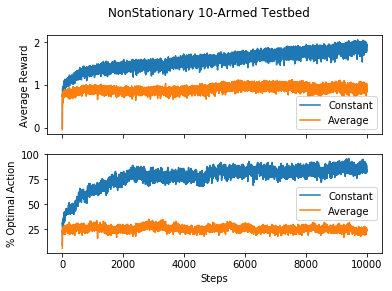

In [7]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True)
fig.suptitle("NonStationary 10-Armed Testbed")
ax1.plot(time, rewards_const, label="Constant")
ax1.plot(time, rewards_avg, label="Average")
ax1.set(ylabel="Average Reward")
ax1.legend()
ax2.plot(time, opt_const, label="Constant")
ax2.plot(time, opt_avg, label="Average")
ax2.set(ylabel="% Optimal Action", xlabel="Steps")
ax2.legend()
plt.show()